In [1]:
import matplotlib.pyplot as plt
import urllib.request
import pandas as pd
import pylab as pl
import numpy as np
import datetime as dt
from pandas.plotting import register_matplotlib_converters
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

url = 'https://drive.google.com/uc?export=download&id=1wIAQGVQEvqI8ACUVepjmkr5sdYHR30N3'
filename = 'Ruthenium_Prices.csv'
urllib.request.urlretrieve(url, filename)
df = pd.read_csv("Ruthenium_Prices.csv", sep=';')

# take a look at the dataset
df.head()


,Date,Price in $
0,2020-05-31,270.0
1,2020-04-30,270.0
2,2020-03-31,260.0
3,2020-02-29,250.0
4,2020-01-31,250.0


In [2]:
register_matplotlib_converters()
df['Date']= pd.to_datetime(df['Date']) 
# summarize the data
df.describe()

,Price in $
count,335.000000
mean,119.835821
std,126.144295
min,18.000000
25%,40.000000
50%,69.000000
75%,170.000000
max,850.000000


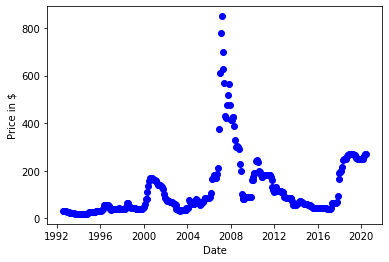

In [3]:
plt.scatter(df.Date, df['Price in $'],  color='blue')
plt.xlabel("Date")
plt.ylabel("Price in $")
plt.show()

In [4]:
df['Date']=df['Date'].map(dt.datetime.toordinal)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [5]:

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Date']])
train_y = np.asanyarray(train[['Price in $']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.01472588]]
Intercept:  [-10672.1067637]


Text(0, 0.5, 'Price in $')

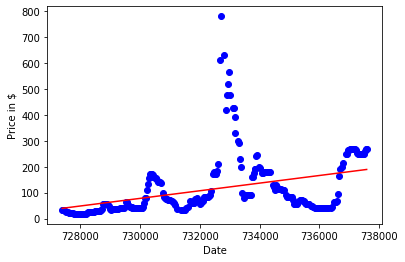

In [6]:
plt.scatter(train.Date, train['Price in $'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Date")
plt.ylabel("Price in $")

In [7]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Date']])
test_y = np.asanyarray(test[['Price in $']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 97.27
Residual sum of squares (MSE): 26344.08
R2-score: -16.10


In [8]:
regr.fit (test_x, test_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Price in $')

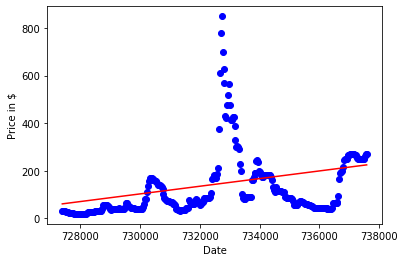

In [9]:
plt.scatter(df.Date, df['Price in $'],  color='blue')
plt.plot(df.Date, regr.coef_[0][0]*df.Date + regr.intercept_[0], '-r')
plt.xlabel("Date")
plt.ylabel("Price in $")

In [24]:
date_entry=input("Enter future date in YYYY-MM-DD format: ")
year,month,day= map(int,date_entry.split('-'))
date1=dt.date(year,month,day)
date1= pd.to_datetime(date1) 
date1=date1.toordinal()
date1=[date1]
price=regr.predict([date1])
print("$ "+str(int(price[0][0])))

Enter future date in YYYY-MM-DD format: 2022-2-2
$234
